# Evolution strategies on test functions for optimization

## Test functions for optimization

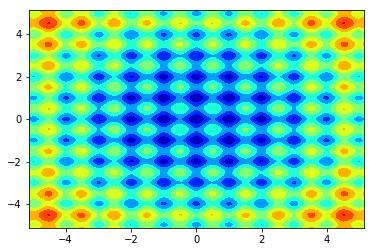

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from lagom.es import rastrigin
from lagom.es import sphere
from lagom.es import styblinski_tang
from lagom.es import holder_table


x = np.linspace(-5.12, 5.12, num=100)
y = np.linspace(-5.12, 5.12, num=100)
x, y = np.meshgrid(x, y)

z = rastrigin([x, y])

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.contourf(x, y, z, cmap='jet')

In [34]:
from lagom.es import BaseESWorker
from lagom.es import BaseESMaster
from lagom.es import CMAES

from lagom.utils import timed
from lagom.utils import set_global_seeds


class Worker(BaseESWorker):
    def f(self, config, solution):
        return rastrigin(solution)
    

class Master(BaseESMaster):
    def logging(self, logger, generation, solutions, function_values):
        logger('generation', generation)
        logger('best_f_val', self.es.result['best_f_val'])
        if generation == 0 or (generation+1)%500 == 0:
            print(f'Generation {generation+1}: ')
            print(f'\tBest function value: {self.es.result["best_f_val"]}')
          
    
set_global_seeds(0)
es = CMAES(mu0=[3]*100, 
           std0=0.5, 
           popsize=32)
master = Master(Worker, es, None)
with timed():
    logger = master(5000)

(16_w,32)-aCMA-ES (mu_w=9.2,w_1=19%) in dimension 100 (seed=818854, Mon Mar  4 12:05:01 2019)
Generation 1: 
	Best function value: 1745.1242411945768
Generation 500: 
	Best function value: 156.36059103384986
Generation 1000: 
	Best function value: 156.20826891976614
Generation 1500: 
	Best function value: 156.2082689197655
Generation 2000: 
	Best function value: 156.2082689197655
Generation 2500: 
	Best function value: 156.2082689197655
Generation 3000: 
	Best function value: 156.2082689197655
Generation 3500: 
	Best function value: 156.2082689197655
Generation 4000: 
	Best function value: 156.2082689197655
Generation 4500: 
	Best function value: 156.2082689197655
Generation 5000: 
	Best function value: 156.2082689197655

Total time: 0:01:58


Text(0.5, 1.0, 'Rastrigin function')

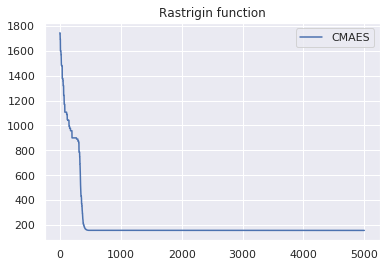

In [36]:
import seaborn as sns

sns.set()
logs = logger.logs
ax = sns.lineplot(logs['generation'], logs['best_f_val'], label='CMAES')
ax.set_title('Rastrigin function')